In [1]:
from parser_java import get_unit_test_files, get_target_files
from file_metrics import  get_history_files
from plot_utils import plot_lines_test_vs_target_numeric_side_by_side
from modfied_file import get_modifications_of_files
from scoring_tdd import tdd_score
repo_path = "/Users/david/development/ucl/soft_prac/apache_repos/griffin"

In [2]:
import os

all_test_files = get_unit_test_files(repo_path)
map_files = get_target_files(repo_path, all_test_files)

all_files = [map_['test'] for map_ in map_files] + [map_['target'] for map_ in map_files]
all_files_info = get_modifications_of_files(repo_path, all_files)

map_files_info = []
for map_ in map_files:
    map_files_info.append({
        'test': all_files_info[map_['test']],
        'target': all_files_info[map_['target']]
    })  

Total number of test files:  33
Total number of target files found:  28


In [3]:

map_before, map_same, map_after = get_history_files(map_files_info)
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))


Before: 0
Same: 11
After: 17


In [4]:
tdd_score_before = tdd_score(map_before)
tdd_score_same = tdd_score(map_same)
tdd_score_after = tdd_score(map_after)

print("TDD Score Before: " + str(tdd_score_before))
print("TDD Score Same: " + str(tdd_score_same))
print("TDD Score After: " + str(tdd_score_after))

TDD Score Before: None
TDD Score Same: 1.4876669204001738
TDD Score After: 1.0681491659355438


In [5]:

with open("test.txt", "w") as f:
    for pair in map_same:
        test_file = pair['test']
        for changes in test_file:
            msg = changes['commit'].msg
            if " test " in msg:
                f.write(msg + "\n")



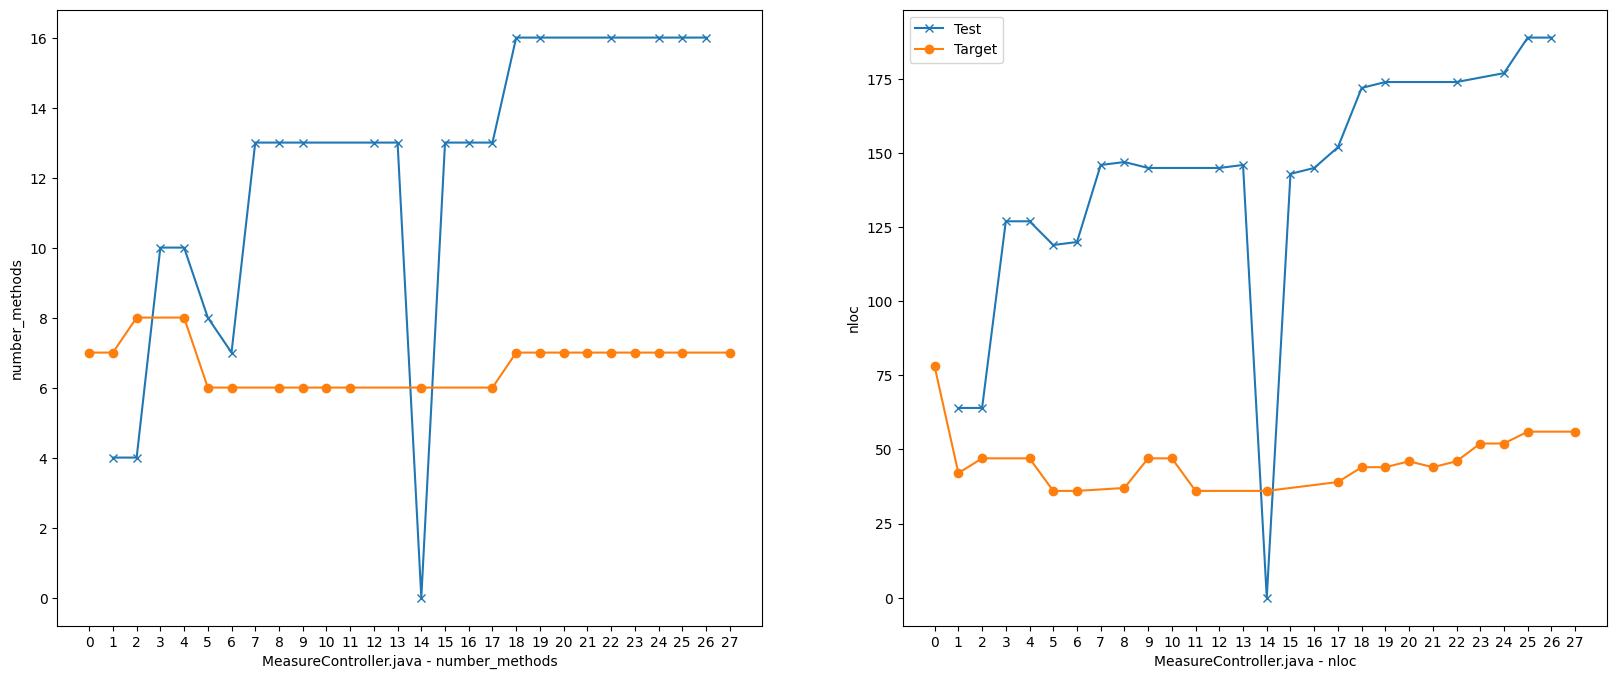

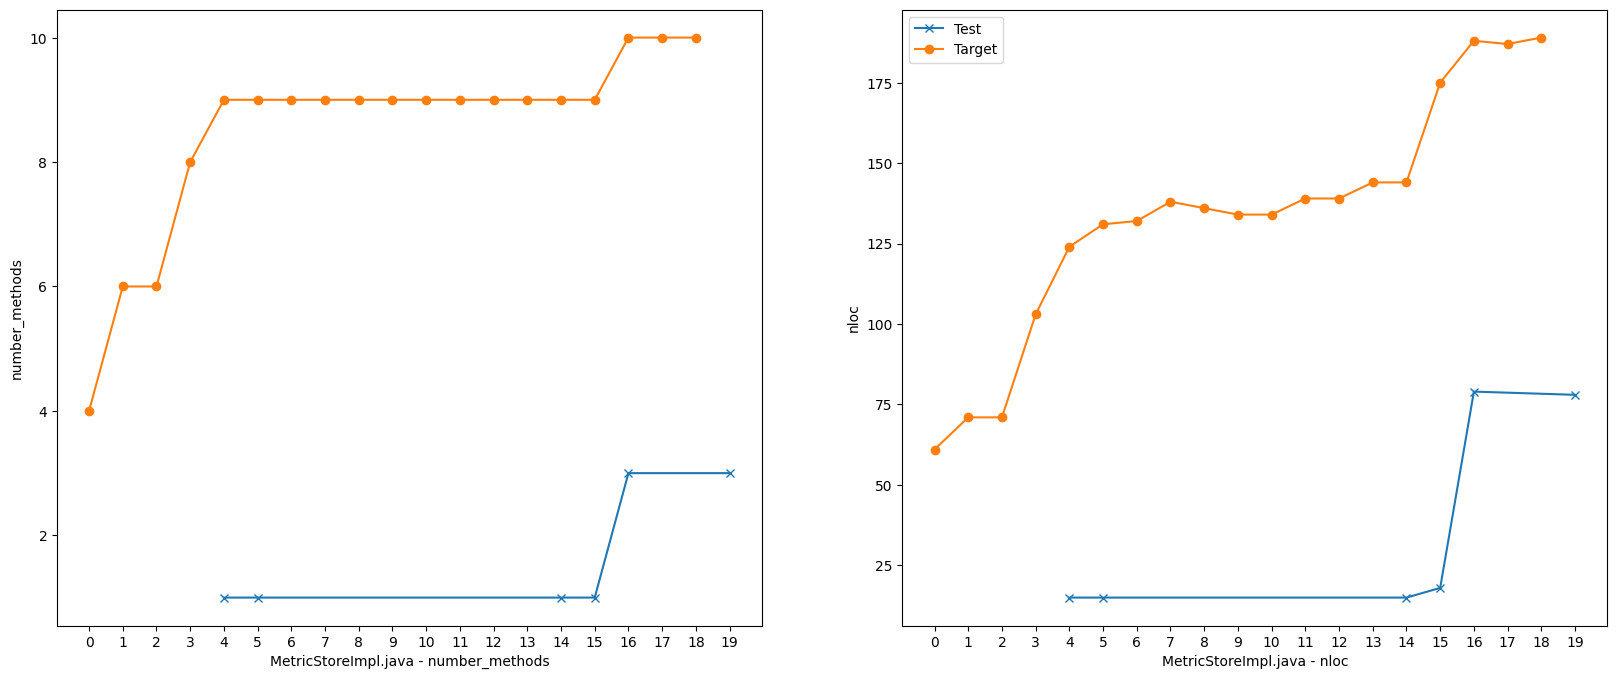

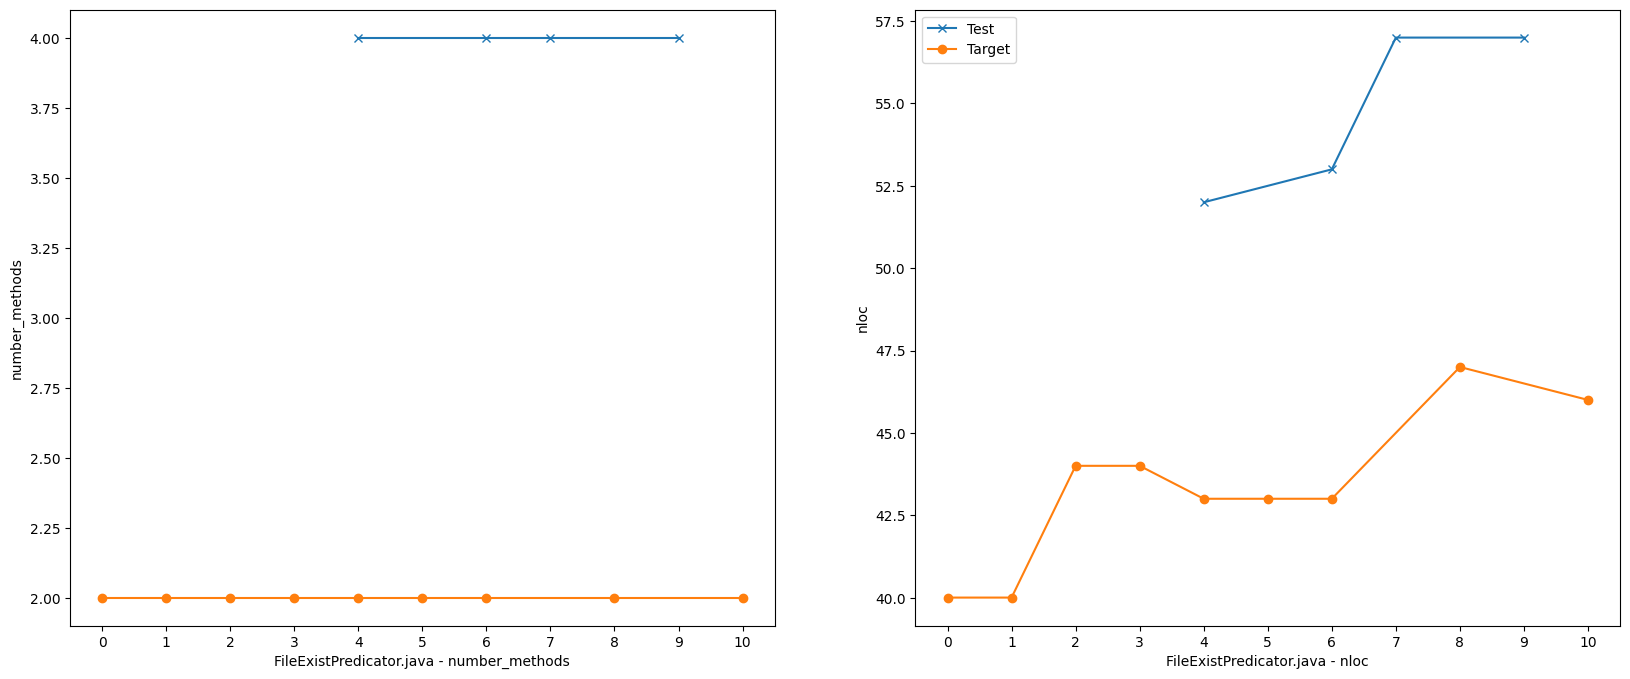

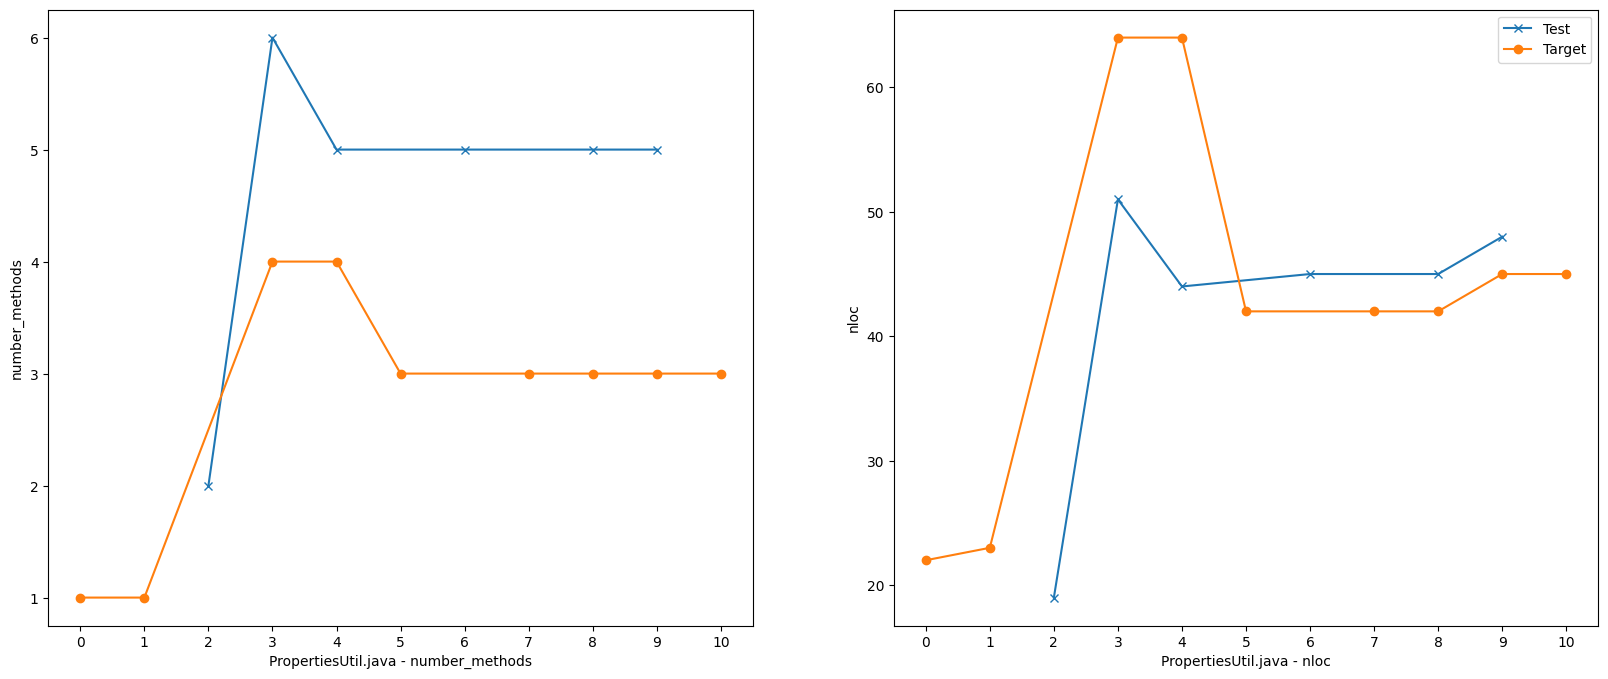

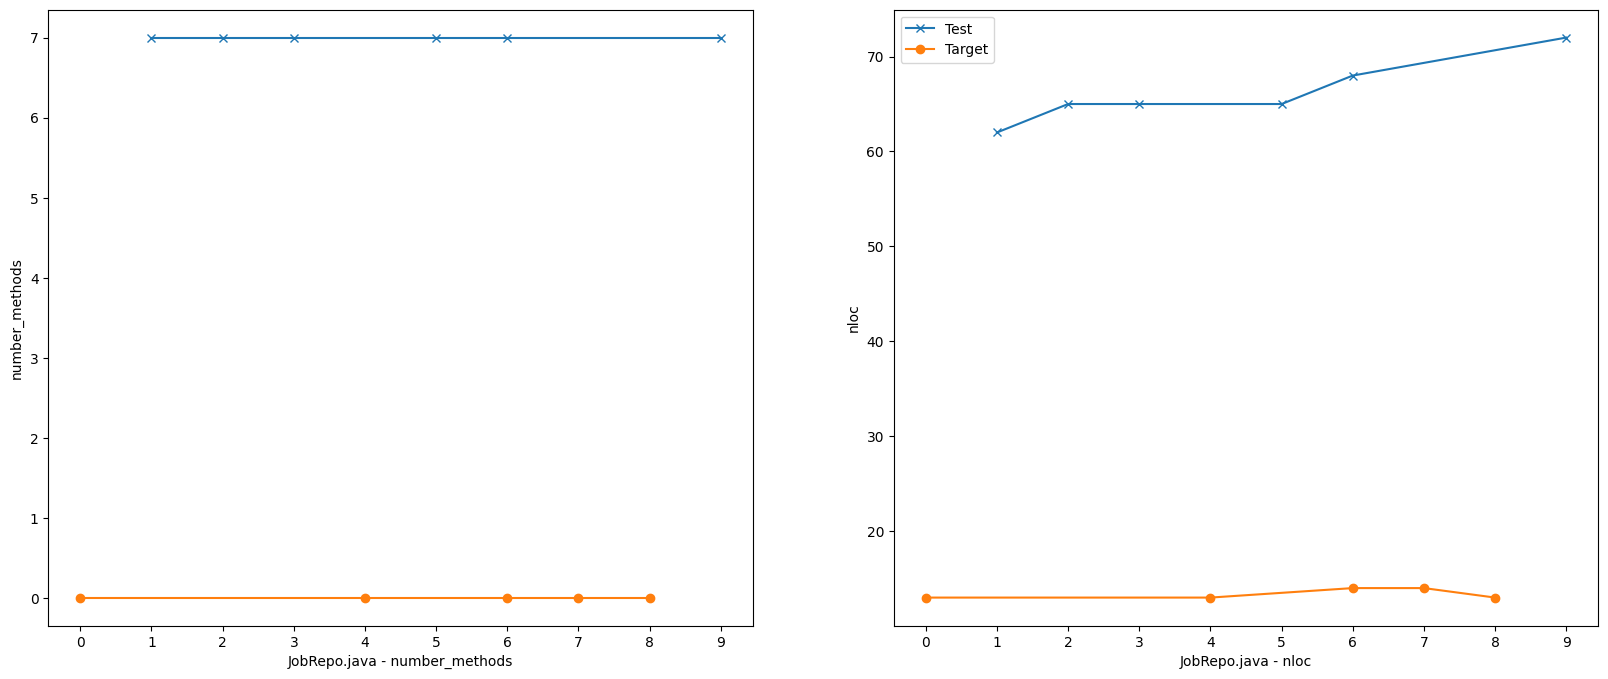

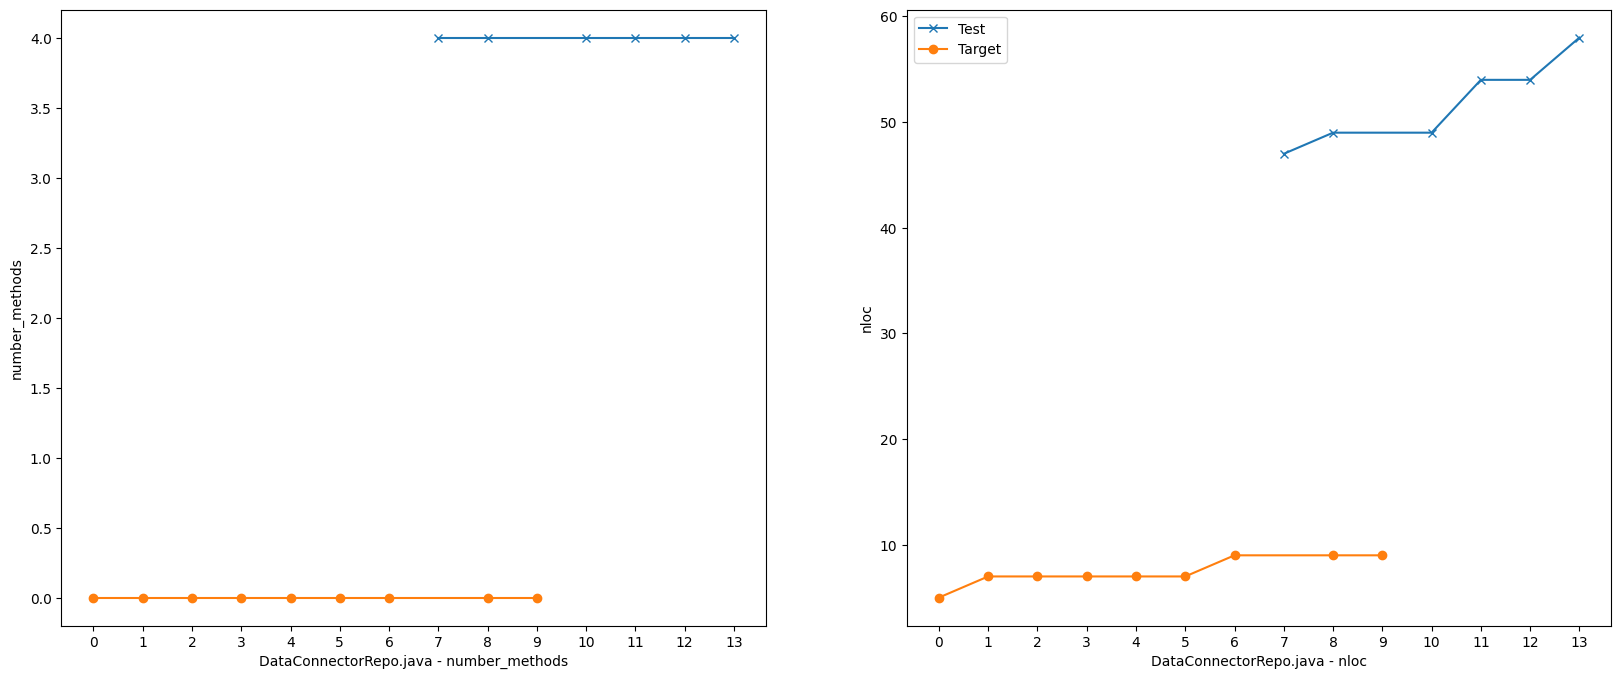

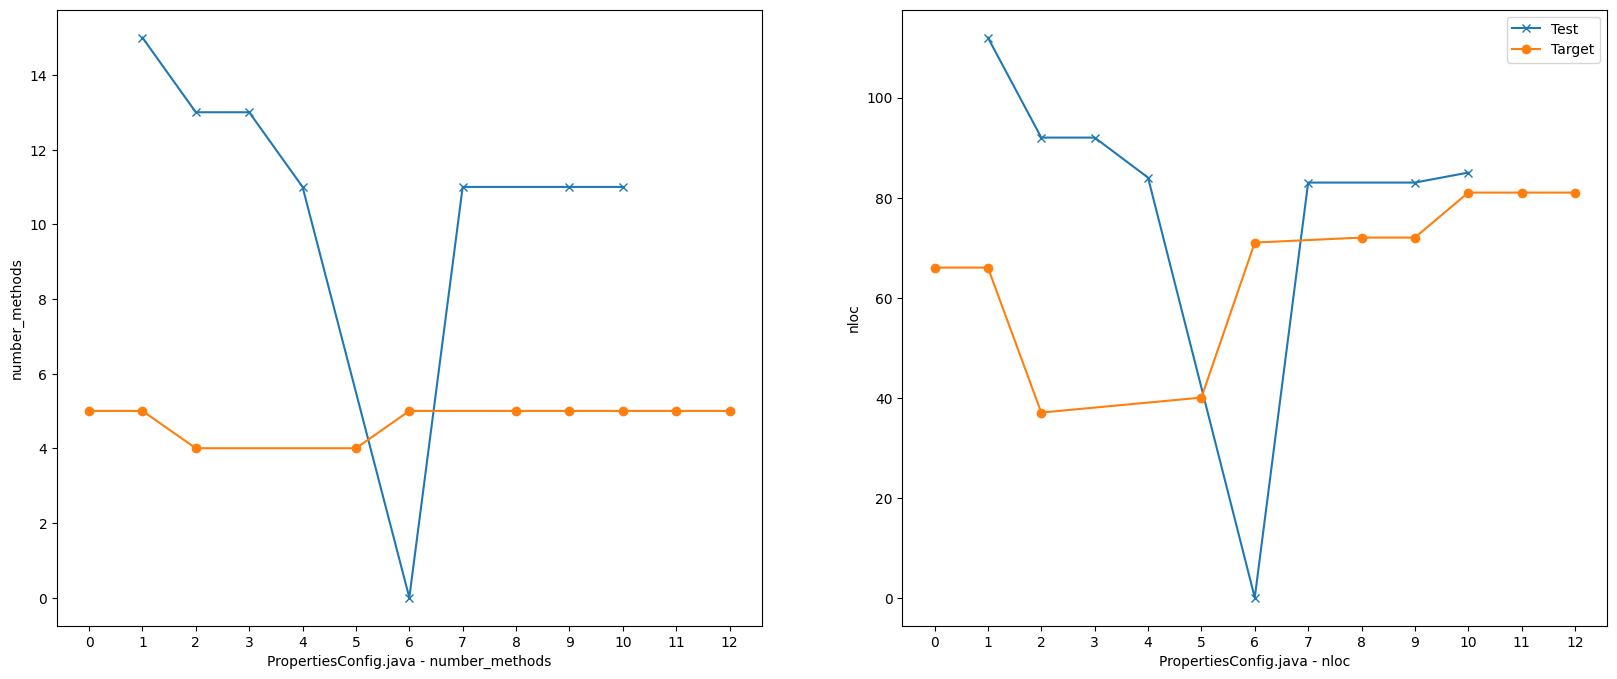

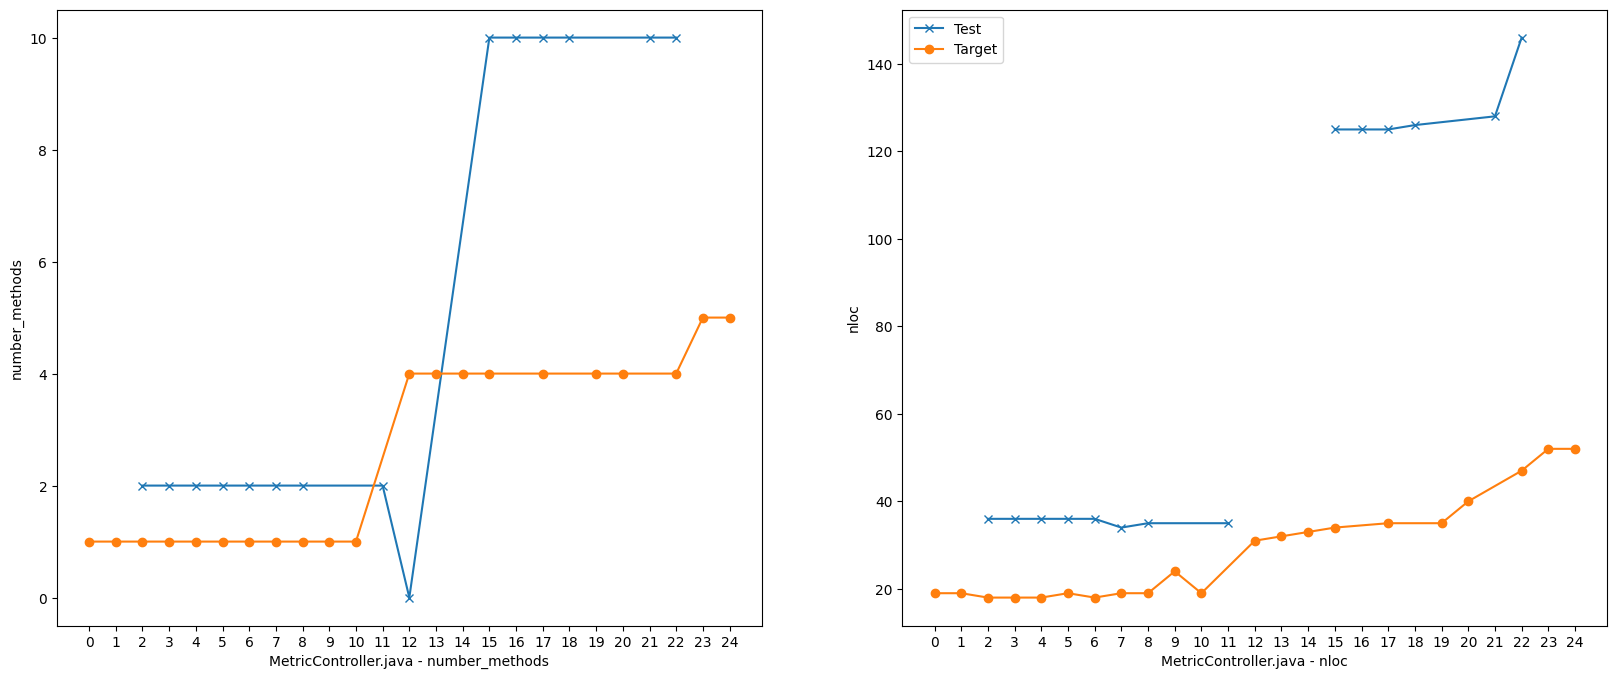

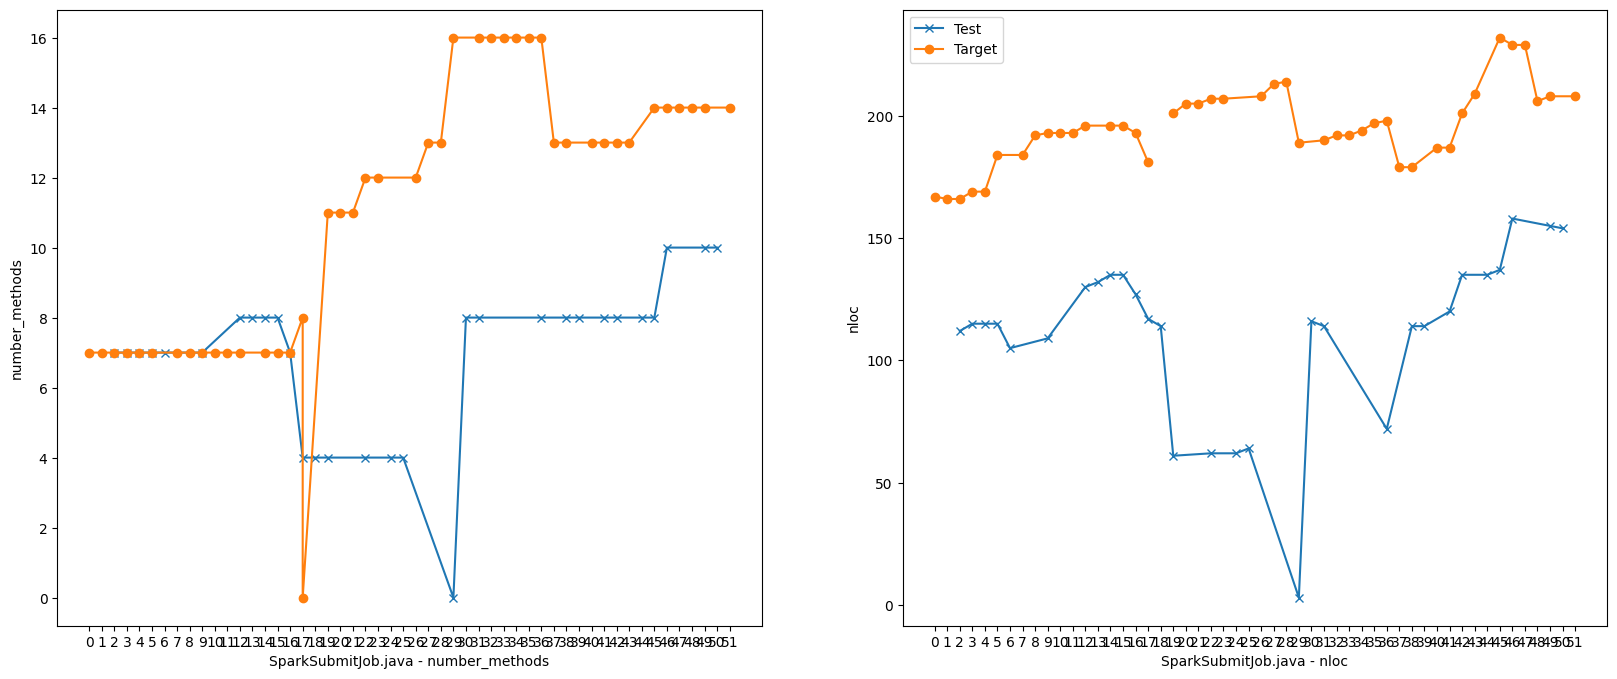

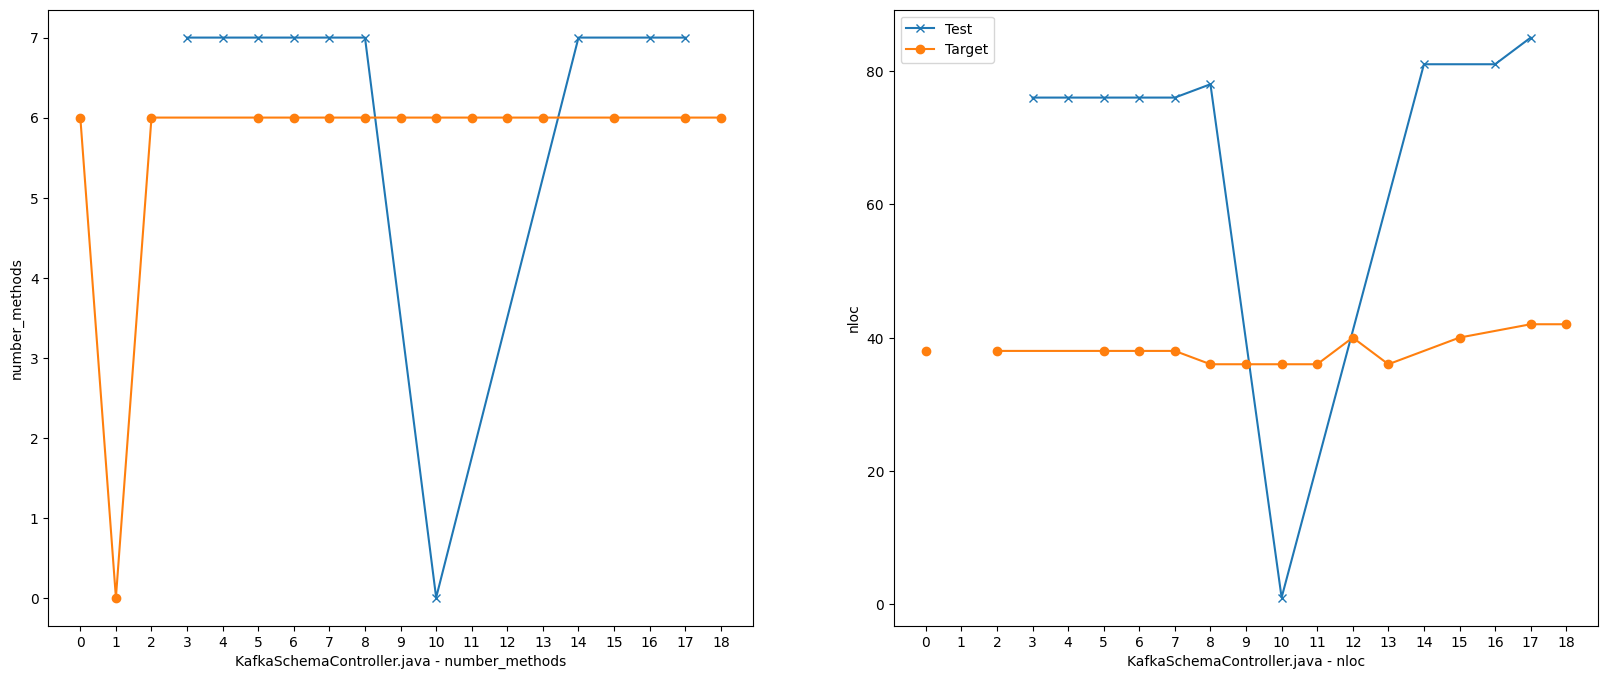

In [6]:
for map_ in map_after[:10]:
    plot_lines_test_vs_target_numeric_side_by_side(map_['test'], map_['target'], "number_methods", "nloc")